In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Explore & Visualize the data

## Loading the training set

In [2]:
import os

import logging
logger = logging.getLogger()
logging.basicConfig(
    level=logging.INFO,
    format='%(levelname)s:%(message)s'
)

In [3]:
from titanic2 import TitanicETL

# Study attributes and their characteristics

- dtypes
- NaNs
- Distributions
- etc.

## Potentially useful features

- has cabin
- in cabin shared by X passengers
- One-hot by cabin letter

In [4]:
data = TitanicETL('data/copy_custom_train.csv')

In [5]:
df = data.get()

# Describe

In [6]:
df.iloc[:,1:7].describe(include='all')

,Pclass,SibSp,Parch,Fare,HasCabin,C0
count,713.000000,713.000000,713.000000,713.000000,713,713.000000
unique,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,548,NaN
mean,2.300140,0.476858,0.382889,33.813054,NaN,0.768583
std,0.841155,0.965608,0.805939,53.941465,NaN,0.422034
min,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2.000000,0.000000,0.000000,7.895800,NaN,1.000000
50%,3.000000,0.000000,0.000000,14.500000,NaN,1.000000
75%,3.000000,1.000000,0.000000,30.695800,NaN,1.000000


# Exploration

## Embarked

We've got a null. If we decide to use Embarked in the ML we'll get rid of this one. Otherwise we keep her.

Let's turn this into a one hot and get rid of the original column.

## Age

Let's get rid of it? There are too many `NaNs`.

## Cabins

Is there a correlation with price?

Let's turn this into a boolean column as well as a one hot encoded matrix. Ok, done.

## Sex

We'll have to turn the `male`/`female` values into ones and zeroes. In this case Male=1, Female=0.

## Name and Ticket

These are too unique to really tell me anything. I'm going to drop them.

# Visualize the data

[Scatter Matrix](https://github.com/pandas-dev/pandas/blob/2fdf1e256e5e0b7f1fe909629e2f0b7893c8c7c3/pandas/plotting/_misc.py#L17)

In [9]:
from pandas.plotting import scatter_matrix

/home/emilio/anaconda3/envs/ml1/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad9676c4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fad8a4000b8>]], dtype=object)

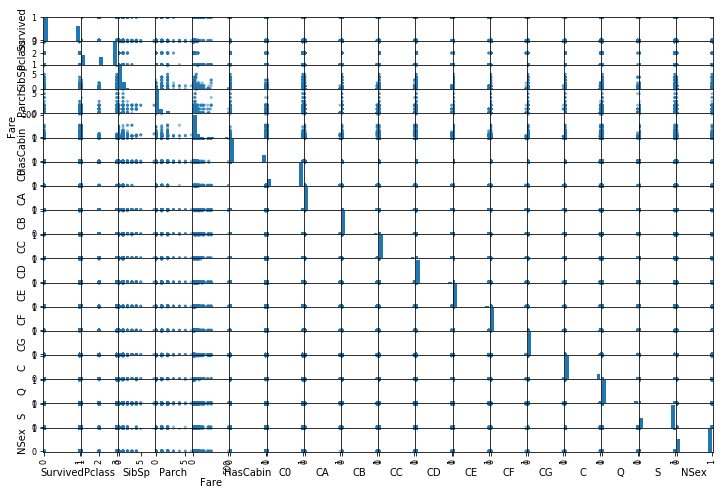

In [10]:
scatter_matrix(df, figsize=(12,8))

# Appendix A: Stuff I've learned here

1. In addition to `DataFrame.isnull()` we also have `notna()` which returns the inverse.
1. To use a column as the index use `DataFrame.set_index('Column')`.
1. Scikit-Learn has a `OneHotEncoder()` but Pandas has `pd.get_dummies(data)`.

# Appendix B: Annotations

**Cabin letters** have been turned into a one hot encoded matrix where `C0` means the passenger did not have a cabin. `CX` then means the passenger was in a cabin starting with the letter `X`.

**Embarked letters** have been turned into a one hot encoded matrix. Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.

# Appendix C: Available columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 891
Data columns (total 18 columns):
Survived    713 non-null int64
Pclass      713 non-null int64
SibSp       713 non-null int64
Parch       713 non-null int64
Fare        713 non-null float64
HasCabin    713 non-null bool
C0          713 non-null uint8
CA          713 non-null uint8
CB          713 non-null uint8
CC          713 non-null uint8
CD          713 non-null uint8
CE          713 non-null uint8
CF          713 non-null uint8
CG          713 non-null uint8
C           713 non-null uint8
Q           713 non-null uint8
S           713 non-null uint8
NSex        713 non-null int8
dtypes: bool(1), float64(1), int64(4), int8(1), uint8(11)
memory usage: 62.5 KB


In [8]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,HasCabin,C0,CA,CB,CC,CD,CE,CF,CG,C,Q,S,NSex
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,False,1,0,0,0,0,0,0,0,0,0,1,1
3,1,3,0,0,7.9250,False,1,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,53.1000,True,0,0,0,1,0,0,0,0,0,0,1,0
5,0,3,0,0,8.0500,False,1,0,0,0,0,0,0,0,0,0,1,1
6,0,3,0,0,8.4583,False,1,0,0,0,0,0,0,0,0,1,0,1
